In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load supervised data
df = pd.read_csv("./DATA/Supervised_dataset.csv")
df.head()
# Separate features and labels


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Annotation,Subject,Age,Gender,Height_cm,Weight_kg,Annotation_Numeric
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Relax,Subject1,30,M,177,94,0
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Relax,Subject1,30,M,177,94,0


In [26]:
df2=pd.read_csv('./DATA/windowed_features.csv')
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [27]:
df['Acc_magnitude']=np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)  

In [28]:
df.drop(columns=['AccX', 'AccY', 'AccZ','Gender','Height_cm','Weight_kg','Subject'], inplace=True)

In [29]:
df.rename(columns={'Annotation_Numeric': 'label'}, inplace=True)

In [30]:
df.head()

,SpO2,HR,Temp,EDA,Annotation,Age,label,Acc_magnitude
0,96.999969,89.000763,30.100043,0.083039,Relax,30,0,1.159528
1,96.999969,88.000137,30.100043,0.081028,Relax,30,0,1.153905
2,96.999969,87.000443,30.100043,0.083039,Relax,30,0,1.153905
3,96.999969,87.000443,30.100043,0.083039,Relax,30,0,1.160558
4,96.999969,87.000443,30.100043,0.081028,Relax,30,0,1.152042


In [31]:
df.drop(columns=['Annotation'], inplace=True)

In [32]:
features = df.drop('label', axis=1)
labels = df['label'].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Add label back for windowing
df_scaled['label'] = labels

# Set window size
window_size = 30
num_windows = len(df_scaled) // window_size

windowed_features = []
windowed_labels = []

for i in range(num_windows):
    window = df_scaled.iloc[i*window_size : (i+1)*window_size]
    
    # Only mean features
    means = window.drop('label', axis=1).mean().values
    
    # Label: majority vote in the window
    label = mode(window['label'], keepdims=False).mode.item()
    
    windowed_features.append(means)
    windowed_labels.append(label)

# Create DataFrame
columns = [f"{col}_mean" for col in features.columns]
windowed_df = pd.DataFrame(windowed_features, columns=columns)
windowed_df['label'] = windowed_labels

# Save result
windowed_df.to_csv("Supervised_windowed.csv", index=False)


In [34]:
df3=pd.read_csv('./DATA/Supervised_windowed.csv')

In [36]:
df3.shape

(1536, 7)

In [38]:
df2.shape

(1536, 5)

In [39]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Age_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,1.069476,0.365992,0
1,0.292252,-0.073149,-0.782789,-0.782401,1.069476,0.349516,0
2,0.389524,-0.497982,-0.594906,-0.781311,1.069476,-0.384603,0
3,-0.213562,-0.386874,-0.432073,-0.780996,1.069476,-0.536413,0
4,-0.019018,-0.404306,-0.319343,-0.780714,1.069476,-0.533821,0


In [40]:
df3.drop(columns=['Age_mean'], inplace=True)

In [41]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,0.365992,0
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516,0
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603,0
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413,0
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821,0


In [57]:
df3['label'].value_counts()

label
0    800
2    277
3    239
1    220
Name: count, dtype: int64

In [42]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [43]:
feature_cols = ['SpO2_mean', 'HR_mean', 'Temp_mean', 'EDA_mean', 'Acc_magnitude_mean']
supervised_df = df3[feature_cols + ['label']]
unsupervised_df = df2[feature_cols]

In [44]:
# Separate features and labels
X_supervised = df3[feature_cols]
y_supervised = df3['label']

X_unsupervised = df2.copy()
y_unsupervised = np.full(X_unsupervised.shape[0], -1)  # unlabeled

# Combine
X_all = pd.concat([X_supervised, X_unsupervised], ignore_index=True)
y_all = np.concatenate([y_supervised, y_unsupervised])


In [46]:
X_all.shape

(3072, 5)

In [49]:
X_all.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean
0,0.370070,0.395262,-1.045836,-0.782714,0.365992
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821


In [47]:
y_all.shape

(3072,)

In [48]:
from sklearn.semi_supervised import LabelSpreading

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Apply Label Spreading
model = LabelSpreading(kernel='rbf', alpha=0.2)
model.fit(X_scaled, y_all)

# Predict labels for the previously unlabeled data
predicted_labels = model.transduction_[len(y_supervised):]


In [50]:
df2['predicted_label'] = predicted_labels
df2.to_csv("unlabeled_with_predictions.csv", index=False)


In [51]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,predicted_label
0,-0.782714,0.395262,-1.045836,0.370070,0.365992,0
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516,0
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603,0
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413,0
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821,0


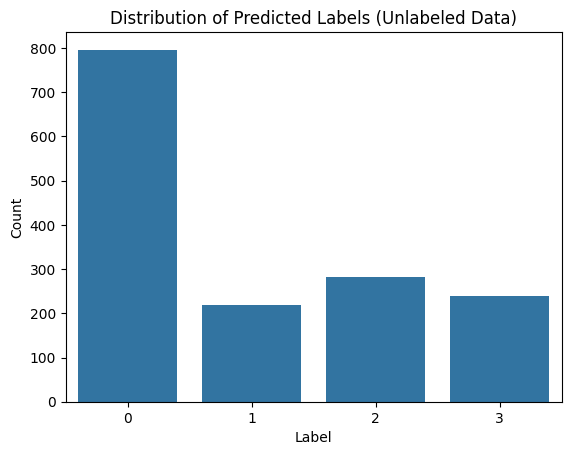

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize predicted labels
sns.countplot(x='predicted_label', data=df2)
plt.title("Distribution of Predicted Labels (Unlabeled Data)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


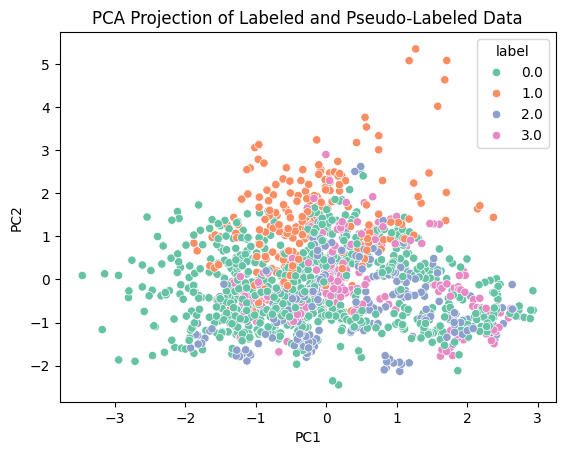

In [54]:
from sklearn.decomposition import PCA

# Optional: combine original + pseudo-labeled
combined_df = pd.concat([
    supervised_df,
    unsupervised_df.rename(columns={'predicted_label': 'label'})
], ignore_index=True)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_df[feature_cols])
combined_df['PC1'] = X_pca[:, 0]
combined_df['PC2'] = X_pca[:, 1]

# Plot
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='label', palette='Set2')
plt.title("PCA Projection of Labeled and Pseudo-Labeled Data")
plt.show()


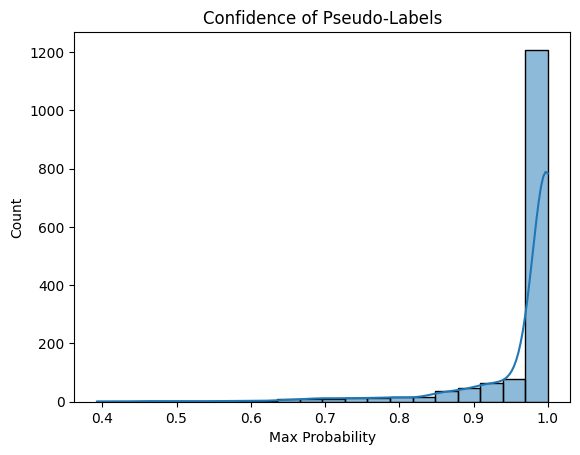

In [55]:
# Get label distributions
label_distributions = model.label_distributions_

# Get max probability for each prediction (confidence)
pseudo_confidences = label_distributions[len(y_supervised):].max(axis=1)

# Visualize confidence
sns.histplot(pseudo_confidences, bins=20, kde=True)
plt.title("Confidence of Pseudo-Labels")
plt.xlabel("Max Probability")
plt.ylabel("Count")
plt.show()


In [58]:
df2['predicted_label'].value_counts()

predicted_label
0    796
2    282
3    239
1    219
Name: count, dtype: int64

In [59]:
df3['label'].value_counts()

label
0    800
2    277
3    239
1    220
Name: count, dtype: int64